# **CASE: PATOLOGIAS**

---

### Instalação de bibliotecas

In [1]:
# # Para análise de cesta de compras
# install.packages("arules")
# install.packages("arulesViz")

### Carregamento de bibliotecas

In [2]:
library(arules)
library(arulesViz)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




### Leitura da base de dados

In [3]:
dados_patologias <- read.table("../Dados/Patologias.txt",
                               sep = "\t",
                               header = TRUE)

In [4]:
head(dados_patologias)

,ID_PACIENTE,PATOLOGIA
,<int>,<chr>
1,1,Hipertensao
2,1,ApneiaDoSono
3,1,SindrMetabolica
4,2,InsuficienciaCardiaca
5,2,ApneiaDoSono
6,2,DoencaArterialCoronariana


### Converter os dados para formato de transações (no caso, pacientes)

In [5]:
pacientes <- as(split(dados_patologias$PATOLOGIA, dados_patologias$ID_PACIENTE), "transactions")

### Visualizar os 10 primeiros pacientes

In [6]:
inspect(pacientes[1:10])

     items                        transactionID
[1]  {ApneiaDoSono,                            
      Hipertensao,                             
      SindrMetabolica}                       1 
[2]  {ApneiaDoSono,                            
      DoencaArterialCoronariana,               
      InsuficienciaCardiaca}                 2 
[3]  {DiabetesTipo2,                           
      DoencaRenalCronica,                      
      Hipertensao}                           3 
[4]  {Dislipidemia,                            
      DoencaArterialCoronariana,               
      SindrMetabolica}                       4 
[5]  {DiabetesTipo2,                           
      DoencaRenalCronica,                      
      Hipertensao}                           5 
[6]  {DiabetesTipo2,                           
      DoencaRenalCronica,                      
      Hipertensao,                             
      InsuficienciaCardiaca}                 6 
[7]  {DiabetesTipo2,                    

### Análise exploratória

In [7]:
# Distribuição da quantidade de patologias por paciente
table(size(pacientes))
prop.table(table(size(pacientes)))


  2   3   4 
174 549 287 


        2         3         4 
0.1722772 0.5435644 0.2841584 

In [8]:
# Tabela de frequências das patologias
frequencias <- sort(itemFrequency(pacientes), decreasing = TRUE)
View(as.data.frame(frequencias))

,frequencias
,<dbl>
DiabetesTipo2,0.4653465
DoencaArterialCoronariana,0.3732673
Hipertensao,0.3425743
DoencaRenalCronica,0.3138614
Obesidade,0.3029703
ApneiaDoSono,0.2960396
Dislipidemia,0.2752475
InsuficienciaCardiaca,0.2673267
EsteatoseHepatica,0.2386139


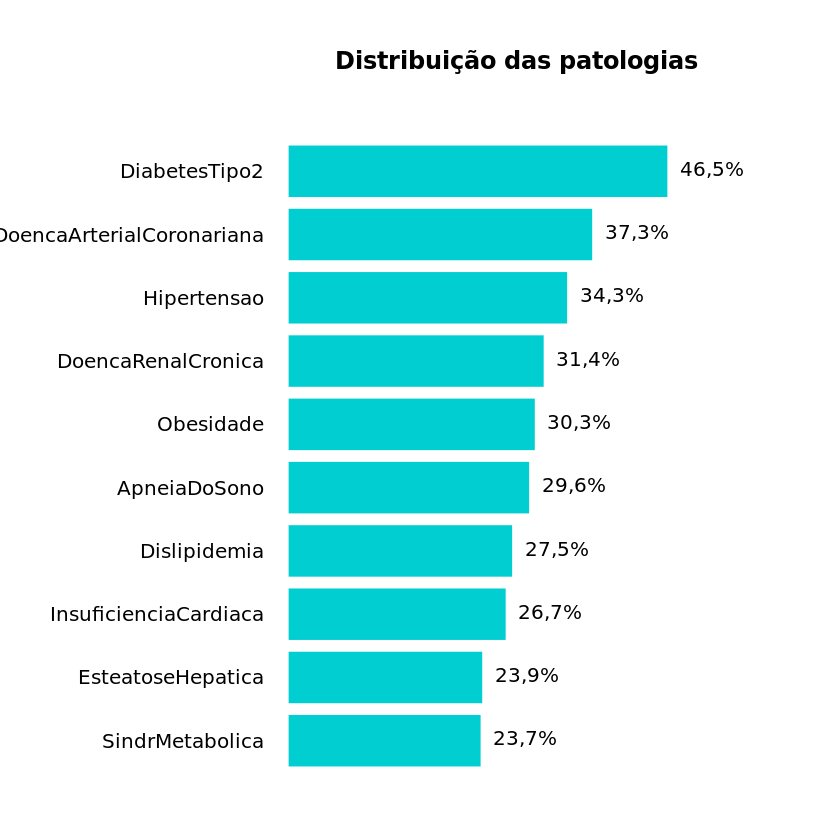

In [9]:
# Gráfico de barras com frequências das patologias
par(mar = c(bottom = 2, left = 12, top = 5, right = 4))
bp <- barplot(rev(frequencias),
              horiz = TRUE,
              las = 1,
              axes = FALSE,
              xlim = c(0, max(frequencias) * 1.2),
              col = "darkturquoise",
              border = "white",
              main = "Distribuição das patologias")
text(x = rev(frequencias),
     y = bp,
     labels = paste0(sub("\\.", ",", round(rev(frequencias), 3) * 100), "%"),
     pos = 4,
     col = "black")

### Aplicação do algoritmo apriori

In [10]:
regras <- apriori(pacientes, parameter = list(supp = 0.05, conf = 0.7, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 50 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 1010 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


### Remoção de regras redundantes

In [11]:
regras <- regras[!is.redundant(regras)]

### Seleção de regras com lift maior do que 1

In [12]:
regras <- subset(regras, lift > 1)

### Verificação das regras identificadas

In [13]:
# Resumo
summary(regras)

set of 15 rules

rule length distribution (lhs + rhs):sizes
 3  4 
11  4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   3.000   3.267   3.500   4.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.05050   Min.   :0.7011   Min.   :0.05545   Min.   :1.612  
 1st Qu.:0.05297   1st Qu.:0.7343   1st Qu.:0.06832   1st Qu.:1.905  
 Median :0.07129   Median :0.7561   Median :0.09307   Median :2.404  
 Mean   :0.07855   Mean   :0.7890   Mean   :0.10033   Mean   :2.284  
 3rd Qu.:0.08861   3rd Qu.:0.8342   3rd Qu.:0.12030   3rd Qu.:2.516  
 Max.   :0.15248   Max.   :0.9107   Max.   :0.18515   Max.   :3.076  
     count       
 Min.   : 51.00  
 1st Qu.: 53.50  
 Median : 72.00  
 Mean   : 79.33  
 3rd Qu.: 89.50  
 Max.   :154.00  

mining info:
      data ntransactions support confidence
 pacientes          1010    0.05        0.7
                                                                             ca

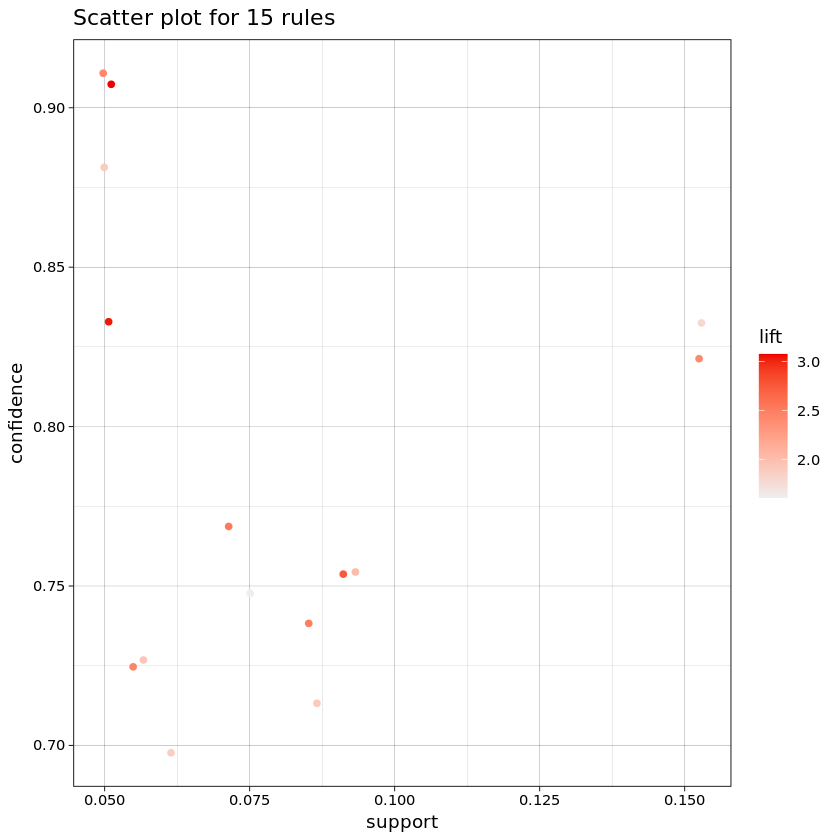

In [14]:
# Examinar graficamente os indicadores (suporte, confiança, lift) das regras identificadas
plot(regras, jitter = TRUE)

In [15]:
# Visualizar regras, da maior para a menor confiança
regras <- sort(regras, by = "confidence")
View(inspect(regras))

NULL

     lhs                             rhs                            support confidence   coverage     lift count
[1]  {ApneiaDoSono,                                                                                             
      DiabetesTipo2,                                                                                            
      Dislipidemia}               => {DoencaArterialCoronariana} 0.05049505  0.9107143 0.05544554 2.439845    51
[2]  {DiabetesTipo2,                                                                                            
      Dislipidemia,                                                                                             
      DoencaArterialCoronariana}  => {ApneiaDoSono}              0.05049505  0.9107143 0.05544554 3.076326    51
[3]  {ApneiaDoSono,                                                                                             
      Dislipidemia,                                                                             

In [16]:
# Extra: Matriz de lifts entre todas as patologias, duas a duas
View(crossTable(pacientes, measure = "lift"))

,ApneiaDoSono,DiabetesTipo2,Dislipidemia,DoencaArterialCoronariana,DoencaRenalCronica,EsteatoseHepatica,Hipertensao,InsuficienciaCardiaca,Obesidade,SindrMetabolica
ApneiaDoSono,NA,0.6252757,1.1421766,1.6038430,0.4582045,0.4485214,0.3416978,1.5013006,0.5409098,0.6642784
DiabetesTipo2,0.6252757,NA,0.5952089,0.5016084,1.2676690,0.8381743,1.4968024,0.5412136,1.2078988,0.3057064
Dislipidemia,1.1421766,0.5952089,NA,1.6286281,0.4011302,1.0251052,0.3150081,0.4978684,0.5105328,1.8697511
DoencaArterialCoronariana,1.6038430,0.5016084,1.6286281,NA,0.3803061,0.8226114,0.2710017,1.1509972,0.4114873,1.3787554
DoencaRenalCronica,0.4582045,1.2676690,0.4011302,0.3803061,NA,0.5684778,1.7035612,0.8614324,0.4685470,0.6132281
EsteatoseHepatica,0.4485214,0.8381743,1.0251052,0.8226114,0.5684778,NA,0.3633703,0.4811741,1.4791311,1.1923818
Hipertensao,0.3416978,1.4968024,0.3150081,0.2710017,1.7035612,0.3633703,NA,0.6919289,0.9539461,0.3419837
InsuficienciaCardiaca,1.5013006,0.5412136,0.4978684,1.1509972,0.8614324,0.4811741,0.6919289,NA,0.5745582,0.7669301
Obesidade,0.5409098,1.2078988,0.5105328,0.4114873,0.4685470,1.4791311,0.9539461,0.5745582,NA,0.4695490
SindrMetabolica,0.6642784,0.3057064,1.8697511,1.3787554,0.6132281,1.1923818,0.3419837,0.7669301,0.4695490,NA
